# valentin

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("global_power_plant_database.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.00,32.3220,65.1190,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009793,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.00,34.5560,69.4787,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009795,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.00,34.6410,69.7170,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009797,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,Nangarhar (Darunta) Hydroelectric Power Plant ...,GEODB0040536,11.55,34.4847,70.3633,Hydro,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,1009787,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,Northwest Kabul Power Plant Afghanistan,GEODB0040540,42.00,34.5638,69.1134,Gas,NaN,NaN,...,http://globalenergyobservatory.org,GEODB,NaN,2017.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_all = df.drop(['country_long', 'name', 'url', 'geolocation_source', 'wepp_id'], axis=1)

If column `gppd_idnr` is unique, we can set it as index:

In [5]:
df_all['gppd_idnr'].is_unique

True

In [6]:
df_all.set_index('gppd_idnr')

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
gppd_idnr,,,,,,,,,,,,,,,,,,
GEODB0040538,AFG,33.00,32.3220,65.1190,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040541,AFG,66.00,34.5560,69.4787,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040534,AFG,100.00,34.6410,69.7170,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040536,AFG,11.55,34.4847,70.3633,Hydro,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
GEODB0040540,AFG,42.00,34.5638,69.1134,Gas,NaN,NaN,NaN,NaN,NaN,GEODB,2017.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRI1022386,ZMB,50.00,-12.9667,28.6333,Oil,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,120.872642
WRI1022384,ZMB,20.00,-12.8167,28.2000,Oil,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,48.349057
WRI1022380,ZMB,108.00,-17.9167,25.8500,Hydro,NaN,NaN,NaN,NaN,ZESCO,Energy Regulation Board of Zambia,NaN,NaN,NaN,NaN,NaN,NaN,702.100000


In [7]:
#Split into one dataset containing estimated and one containing time series data
df_time_series = (df_all.dropna(how='all', subset=['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'])
                      .set_index('gppd_idnr'))


df_time_series_complete = df_time_series.dropna(how='any', subset=['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'])

df_time_series_incomplete = df_time_series[df_time_series[['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017']].isnull().any(axis=1)]

df_estimate = (df_all.dropna(how='any', subset=['estimated_generation_gwh'])
                   .set_index('gppd_idnr'))

In [8]:
#We must have some duplicates
len(df_time_series_incomplete)+len(df_estimate)+len(df_time_series_complete)

31814

In [9]:
#Some rows have both estimate and incomplete time series:
s1 = pd.merge(df_time_series_incomplete, df_estimate, how='inner')
s1

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,AUS,50.0,-34.5034,139.0246,Oil,NaN,NaN,NaN,NaN,Infratil Energy Australia Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,1.653056,5.300833,7.649722,526.452790
1,AUS,37.0,-23.5525,145.3142,Gas,NaN,NaN,NaN,NaN,Ergon Energy Qld Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,3.941667,93.304739
2,AUS,113.0,-36.5817,149.1083,Wind,NaN,NaN,NaN,NaN,Boco Rock Wind Farm Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,208.778611,334.114167,349.301667,94.893070
3,AUS,53.0,-31.9867,141.3915,Solar,NaN,NaN,NaN,NaN,AGL Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,92.104722,127.564722,1059.946475
4,AUS,190.0,-20.5447,147.8049,Coal,NaN,NaN,NaN,NaN,RATCH Australia,Australian Renewable Energy Mapping Infrastruc...,NaN,0.214722,NaN,NaN,NaN,NaN,771.660922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,VNM,66.0,14.3656,108.6943,Hydro,NaN,NaN,NaN,2001.0,Vinh Son- Song Hinh Hydropower JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,228.500000,NaN,230.679596
2526,VNM,28.0,14.3611,108.7203,Hydro,NaN,NaN,NaN,2014.0,Vinh Son Hydropower Investment JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,103.000000,NaN,97.864071
2527,VNM,6.6,21.3412,104.3498,Hydro,NaN,NaN,NaN,NaN,Xim Vang Hydro Power JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,68.000000,NaN,23.067960
2528,VNM,19.5,12.1526,108.3787,Hydro,NaN,NaN,NaN,2010.0,Cao Nguyen - Song Da Hydro Power JSC.,Open Development Vietnam,NaN,NaN,NaN,NaN,79.000000,NaN,68.155335


In [10]:
df_time_series_incomplete

,country,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
gppd_idnr,,,,,,,,,,,,,,,,,,
AUS0000232,AUS,50.0,-34.5034,139.0246,Oil,NaN,NaN,NaN,NaN,Infratil Energy Australia Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,1.653056,5.300833,7.649722,526.452790
AUS0000114,AUS,165.0,-38.3861,144.1828,Coal,NaN,NaN,NaN,NaN,Alcoa of Australia Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,1095.676944,1239.962778,1260.261111,167.880000,NaN,NaN
AUS0000008,AUS,37.0,-23.5525,145.3142,Gas,NaN,NaN,NaN,NaN,Ergon Energy Qld Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,NaN,NaN,3.941667,93.304739
AUS0000027,AUS,9.9,-33.6219,149.1982,Wind,NaN,NaN,NaN,NaN,Eraring Energy,Australian Renewable Energy Mapping Infrastruc...,NaN,15.761667,18.213611,20.082222,18.890833,NaN,NaN
AUS0000394,AUS,113.0,-36.5817,149.1083,Wind,NaN,NaN,NaN,NaN,Boco Rock Wind Farm Pty Ltd,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN,NaN,208.778611,334.114167,349.301667,94.893070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRI1030837,VNM,66.0,14.3656,108.6943,Hydro,NaN,NaN,NaN,2001.0,Vinh Son- Song Hinh Hydropower JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,228.500000,NaN,230.679596
WRI1030836,VNM,28.0,14.3611,108.7203,Hydro,NaN,NaN,NaN,2014.0,Vinh Son Hydropower Investment JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,103.000000,NaN,97.864071
WRI1030888,VNM,6.6,21.3412,104.3498,Hydro,NaN,NaN,NaN,NaN,Xim Vang Hydro Power JSC,Open Development Vietnam,NaN,NaN,NaN,NaN,68.000000,NaN,23.067960


# karina - plots for all data

## 1. Plot distribution of capacity for each fuel type

In [11]:
# Group by the fuel type
fueltype = df_all.groupby("primary_fuel")
fueltype.describe()

capacity_mw                                             \
                     count         mean          std   min        25%   
primary_fuel                                                            
Biomass             1396.0    24.667408    39.970655   1.0     3.0000   
Coal                2390.0   836.619247   883.792022   1.2   200.0000   
Cogeneration          41.0    97.624390   283.717419   1.6     7.5000   
Gas                 3922.0   375.495683   562.794664   1.0    31.1250   
Geothermal           189.0    66.473810   114.770905   1.0    18.0000   
Hydro               7155.0   146.804321   549.433962   1.0     5.3000   
Nuclear              198.0  2069.832626  1304.270269  20.0  1100.0000   
Oil                 2290.0   114.565943   394.966198   1.0     2.5404   
Other                 44.0    85.399091   144.155122   4.5    17.5000   
Petcoke               13.0   192.082885   458.141449   4.7    27.3000   
Solar               5929.0    10.747651    26.418461   1.0     2.0000   
Storage               58.0     7.820690     9.682517   1.0     2.0000   
Waste               1087.0    13.898081    20.690791   1.0     2.3000   
Wave and Tidal        10.0    55.220000   101.440708   1.0     1.4000   
Wind                5188.0    46.299842   102.712898   1.0    10.0000   

                                            latitude             ...  \
                    50%       75%       max    count       mean  ...   
primary_fuel                                                     ...   
Biomass            9.95    29.175    528.00   1396.0  19.364704  ...   
Coal             600.00  1200.000   7000.00   2390.0  32.725796  ...   
Cogeneration      30.00    49.300   1404.00     41.0  38.124766  ...   
Gas              152.25   530.000   8865.00   3922.0  31.662952  ...   
Geothermal        30.00    77.000   1163.00    189.0  29.557186  ...   
Hydro             20.00    93.000  22500.00   7155.0  30.309767  ...   
Nuclear         1883.40  2665.025   8212.00    198.0  38.597543  ...   
Oil                9.20    50.000   6794.00   2290.0  14.116997  ...   
Other             40.00    98.625    845.26     44.0  38.899089  ...   
Petcoke           67.00   122.900   1707.30     13.0  31.472562  ...   
Solar              4.70     9.000    648.00   5929.0  40.678147  ...   
Storage            2.90    10.000     40.00     58.0  39.166022  ...   
Waste              4.90    15.250    160.90   1087.0  39.106433  ...   
Wave and Tidal     5.00    22.250    254.00     10.0  52.995930  ...   
Wind              26.00    49.000   6000.00   5188.0  36.618024  ...   

               generation_gwh_2017               estimated_generation_gwh  \
                               75%           max                    count   
primary_fuel                                                                
Biomass                 338.506503    831.165002                   1241.0   
Coal                   6262.190992  35116.000000                   1846.0   
Cogeneration            166.049000    564.213000                     11.0   
Gas                     530.573000  20515.369720                   2115.0   
Geothermal              303.664250   4667.659000                    127.0   
Hydro                   158.727375  20983.990000                   5438.0   
Nuclear               17592.001000  32340.138000                    128.0   
Oil                       0.732500   6972.247003                   1442.0   
Other                   128.024499    508.701000                     28.0   
Petcoke                 297.125749   5776.007940                      1.0   
Solar                     9.928000   1237.532000                   4567.0   
Storage                   0.056000     34.300000                      0.0   
Waste                    99.123750    928.862008                    538.0   
Wave and Tidal                 NaN           NaN                      0.0   
Wind                    374.916500   1972.964000                   4309.0   

                

In [12]:
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
capacity = fueltype.agg(**{'capacity_sum': pd.NamedAgg(column='capacity_mw', aggfunc='sum')})
capacity = capacity.sort_values(by='capacity_sum', ascending = False)
capacity

,capacity_sum
primary_fuel,
Coal,1.999520e+06
Gas,1.472694e+06
Hydro,1.050385e+06
Nuclear,4.098269e+05
Oil,2.623560e+05
Wind,2.402036e+05
Solar,6.372282e+04
Biomass,3.443570e+04
Waste,1.510721e+04


In [13]:
# https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/
green = ['not green','not green','green','green','not green','green','green','green','green','green','other','other','not green','green','other']
capacity['green'] = green
capacity = capacity.reset_index()
capacity

,primary_fuel,capacity_sum,green
0,Coal,1.999520e+06,not green
1,Gas,1.472694e+06,not green
2,Hydro,1.050385e+06,green
3,Nuclear,4.098269e+05,green
4,Oil,2.623560e+05,not green
5,Wind,2.402036e+05,green
6,Solar,6.372282e+04,green
7,Biomass,3.443570e+04,green
8,Waste,1.510721e+04,green
9,Geothermal,1.256355e+04,green


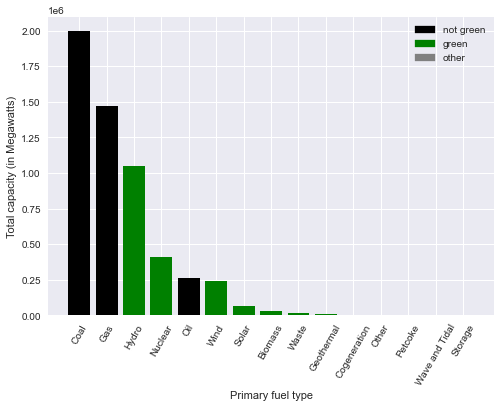

In [14]:
# https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
import matplotlib.pyplot as plt
plt.style.use('seaborn')
colors = {'not green':"black", 'green':"green", 'other':"grey"}  
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
c = capacity['green'].apply(lambda x: colors[x])
plt.bar(capacity['primary_fuel'], capacity['capacity_sum'], color=c, label=colors)
plt.xticks(rotation = 60)
plt.xlabel("Primary fuel type")
plt.ylabel("Total capacity (in Megawatts)", rotation = 90)
plt.legend(handles, labels)

## 2. How many new powerplants in total and of each new fuel type per year (or per n years)

In [15]:
# https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
newpp = df_all[['gppd_idnr','country','primary_fuel','commissioning_year']]
newpp = newpp.dropna()
newpp

,gppd_idnr,country,primary_fuel,commissioning_year
7,WRI1002169,ALB,Hydro,1965.0
8,WRI1002170,ALB,Hydro,1978.0
9,WRI1002171,ALB,Hydro,1985.0
10,WRI1002172,ALB,Hydro,1951.0
11,WRI1002173,ALB,Hydro,1963.0
...,...,...,...,...
29892,WRI1022447,YEM,Gas,2009.0
29893,WRI1022442,YEM,Oil,1981.0
29895,WRI1000020,ZMB,Hydro,1978.0
29896,WRI1000022,ZMB,Hydro,1971.0


In [16]:
newpp['commissioning_year'].unique()

array([1965.      , 1978.      , 1985.      , ..., 1972.049327,
       2001.610205, 2013.77551 ])

In [17]:
# We see that the years can sometimes have decimals, which is nonsensical. Therefore:
newpp['commissioning_year'] = newpp['commissioning_year'].map(int)
newpp['commissioning_year'].unique()

array([1965, 1978, 1985, 1951, 1963, 1958, 1971, 2010, 1980, 2016, 2009,
       2013, 2015, 1988, 1952, 1974, 2007, 2006, 2011, 1975, 1981, 1997,
       1993, 1982, 1987, 1969, 2003, 1977, 2014, 1966, 2002, 1996, 1953,
       1990, 1999, 2008, 1954, 1983, 1943, 1995, 1998, 1967, 1989, 1972,
       1984, 1956, 1950, 1970, 1957, 1968, 2001, 1979, 1962, 1986, 1976,
       2012, 1944, 1991, 1960, 1925, 1964, 1949, 1994, 1926, 1947, 1931,
       2005, 1992, 1946, 1930, 2000, 1973, 1959, 2017, 1912, 1900, 2004,
       1905, 1936, 1940, 1914, 1924, 1955, 1919, 1928, 1911, 1935, 1939,
       1961, 1938, 1941, 1948, 1937, 2018, 1945, 1933, 1932, 1921, 1929,
       1917, 1934, 1910, 1908, 1927, 1922, 1942, 1915, 1920, 1923, 1913,
       1906, 1916, 1907, 1918, 1909, 1902, 1903, 1904, 1901, 1896, 1899],
      dtype=int64)

In [18]:
newyear = newpp.groupby('commissioning_year')
newyear.describe()

gppd_idnr                         country                   \
                       count unique         top freq   count unique  top freq   
commissioning_year                                                              
1896                       1      1  USA0003651    1       1      1  USA    1   
1899                       1      1  USA0000361    1       1      1  USA    1   
1900                       6      6  WRI1004220    1       6      4  BRA    2   
1901                       2      2  WRI1004439    1       2      2  CHE    1   
1902                       4      4  WRI1004237    1       4      2  CHE    3   
...                      ...    ...         ...  ...     ...    ...  ...  ...   
2014                     819    819  WRI1061879    1     819     39  USA  417   
2015                     805    805  USA0061826    1     805     38  USA  424   
2016                     860    860  WRI1022970    1     860     35  USA  529   
2017                     715    715  USA0059250    1     715     21  USA  613   
2018                     175    175  USA0061421    1     175     11  USA  156   

                   primary_fuel                     
                          count unique    top freq  
commissioning_year                                  
1896                          1      1  Hydro    1  
1899                          1      1  Hydro    1  
1900                          6      3  Hydro    3  
1901                          2      1  Hydro    2  
1902                          4      1  Hydro    4  
...                         ...    ...    ...  ...  
2014                        819     11  Solar  368  
2015                        805     12  Solar  335  
2016                        860     10  Solar  448  
2017                        715     11  Solar  491  
2018                        175      7  Solar  142  

[121 rows x 12 columns]

In [19]:
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
nycount = newyear.size()
nycount

commissioning_year
1896      1
1899      1
1900      6
1901      2
1902      4
       ... 
2014    819
2015    805
2016    860
2017    715
2018    175
Length: 121, dtype: int64

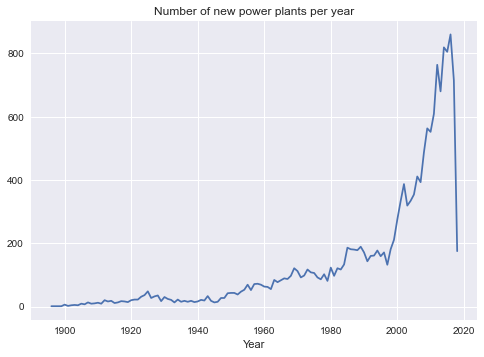

In [20]:
nycountplot = nycount.plot(title = "Number of new power plants per year", xlabel = "Year")

<AxesSubplot:xlabel='Year'>

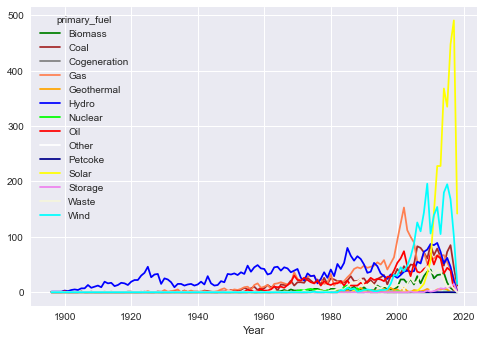

In [21]:
# Exploring which fuel types are responsible for the spikes:

# https://stackoverflow.com/questions/53997862/pandas-groupby-two-columns-and-plot
# https://matplotlib.org/stable/tutorials/colors/colors.html
pd.crosstab(newpp["commissioning_year"],newpp["primary_fuel"]).plot(xlabel = "Year", color = ['green','brown','grey','coral','orange','blue','lime','red','white','darkblue','yellow','violet','beige','cyan'])

# karina - analysis on complete time series

## 3. Hypothesis testing - has there been an increase in energy output between years (2013-2017)?

In [22]:
dfc = df_time_series_complete
dfc1=dfc[["generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017"]]
dfc1.describe()

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,6817.000000,6817.000000,6817.000000,6817.000000,6817.000000
mean,685.020952,688.554481,698.562305,676.278993,726.536342
std,2261.173937,2294.095823,2304.707671,2279.047703,2341.640875
min,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000
25%,2.200000,2.632000,2.511000,2.490000,4.348000
50%,27.118000,26.836320,26.576000,25.858000,36.726000
75%,250.443889,247.330068,251.239000,246.354000,283.000000
max,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000


Text(0, 0.5, 'Energy output (in GWh)')

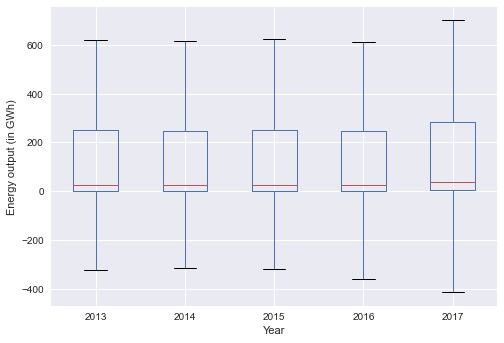

In [23]:
# It seems like there is a slight rise in energy production from 2013 to 2017, judging by the mean and max values above.

# https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
# https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
dfc1.boxplot(showfliers=False) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
plt.xticks([1,2,3,4,5], [2013,2014,2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("Energy output (in GWh)")

Text(0, 0.5, 'Energy output (in GWh)')

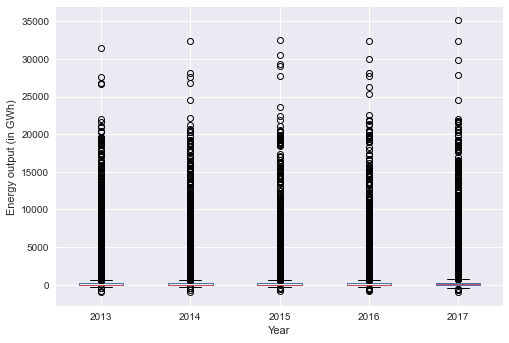

In [24]:
# Just to show how the boxplots look like with outliers:

# https://stackoverflow.com/questions/11285613/selecting-multiple-columns-in-a-pandas-dataframe
# https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn
dfc1.boxplot(showfliers=True) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
plt.xticks([1,2,3,4,5], [2013,2014,2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("Energy output (in GWh)")

In [25]:
# However, the boxplots do not seem to show a significant difference.
# So, is there an increase in energy output throughout the years?
# Let's use ANOVA hypothesis testing as outlined in the hypothesis testing lecture from the Data Analysis course.
# So the null hypothesis is that the mean is similar for all 5 years (2013,2014,2015,2016 and 2017)
# And the alternative hypothesis is that there is a difference between the means.
from scipy.stats import f_oneway
f_oneway(dfc1["generation_gwh_2013"],dfc1["generation_gwh_2014"],dfc1["generation_gwh_2015"],dfc1["generation_gwh_2016"],dfc1["generation_gwh_2017"])

F_onewayResult(statistic=0.48443102568775964, pvalue=0.7472116879358542)

In [26]:
# We see that the pvalue is quite high, and definitely bigger than the standard 0.05 value.
# Therefore, we can conclude that the difference in the means between years is most likely due to chance,
# and that the difference in the means between years is not statistically significant.

# Let's see if there is a difference year-by-year using the t-test 
# as outlined in the hypothesis testing lecture from the Data Analysis course:

In [27]:
from scipy.stats import ttest_ind
t34, pval34 = ttest_ind(dfc1["generation_gwh_2013"],dfc1["generation_gwh_2014"])
print(t34, pval34)

-0.09057218720579535 0.9278338631635166


In [28]:
t45, pval45= ttest_ind(dfc1["generation_gwh_2014"],dfc1["generation_gwh_2015"])
print(t45, pval45)

-0.25410037001138785 0.7994218499512872


In [29]:
t56, pval56 = ttest_ind(dfc1["generation_gwh_2015"],dfc1["generation_gwh_2016"])
print(t56, pval56)

0.5676271408477459 0.5702975217343101


In [30]:
t67, pval67 = ttest_ind(dfc1["generation_gwh_2016"],dfc1["generation_gwh_2017"])
print(t67, pval67)

-1.2698858284702281 0.20414697778985053


## Solar and Wind

In [31]:
# Now, it would be interesting to look specifically at Solar and Wind energy outputs,
# as from the plots above we see that there have been quite a lot of new power plants of these fuel types.
dfc1=dfc[["primary_fuel","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017"]]
dfc1["primary_fuel"].unique()

array(['Wind', 'Gas', 'Waste', 'Hydro', 'Coal', 'Oil', 'Solar', 'Nuclear',
       'Biomass', 'Cogeneration', 'Geothermal', 'Petcoke', 'Other',
       'Storage'], dtype=object)

In [32]:
solar= dfc1[dfc1["primary_fuel"].str.contains('Solar')==True] 
solar["primary_fuel"].unique()
solar.describe()

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,14.176807,23.480800,25.716058,25.673569,25.304770
std,45.808663,86.351426,97.053440,95.958802,95.268087
min,-0.116000,-0.064000,0.000000,0.000000,-0.394000
25%,1.648575,2.133587,2.145498,2.269750,2.084500
50%,2.812500,3.854000,4.003000,4.190500,3.851500
75%,8.333750,10.263250,10.188000,10.652750,10.362750
max,675.525000,1105.857000,1301.337000,1265.760000,1237.532000


In [33]:
from scipy.stats import f_oneway
f_oneway(solar["generation_gwh_2013"],solar["generation_gwh_2014"],solar["generation_gwh_2015"],solar["generation_gwh_2016"],solar["generation_gwh_2017"])

F_onewayResult(statistic=2.01529196320594, pvalue=0.0896483294449274)

In [34]:
# p-value is pretty small, but still a bit bigger than 0.05. Let's look year-by-year:
t34, pval34 = ttest_ind(solar["generation_gwh_2013"],solar["generation_gwh_2014"])
print(t34, pval34)

-2.3585122543025503 0.01850459918420546


In [35]:
t45, pval45= ttest_ind(solar["generation_gwh_2014"],solar["generation_gwh_2015"])
print(t45, pval45)

-0.4263614978350083 0.6699193003742298


In [36]:
t56, pval56 = ttest_ind(solar["generation_gwh_2015"],solar["generation_gwh_2016"])
print(t56, pval56)

0.007713999875312193 0.9938464346216915


In [37]:
t67, pval67 = ttest_ind(solar["generation_gwh_2016"],solar["generation_gwh_2017"])
print(t67, pval67)

0.06758297931762636 0.9461286246538121


<AxesSubplot:xlabel='Year'>

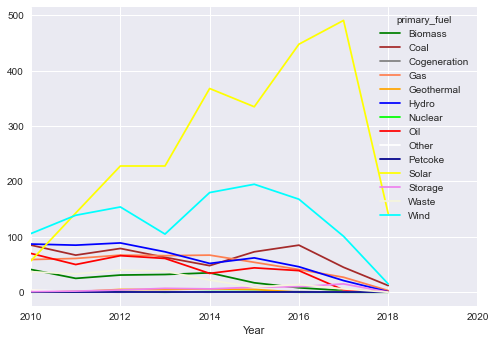

In [38]:
# So only for 2013-2014, the difference in mean could have been statistically significant.
# This is interesting, considering how many new power plants there have been built in that period.
# However, this discrepancy can be due to the fact that these new power plants were built in other 
# countries, which are not in the complete time series dataset (which includes only power plants in USA, India, Australia).

# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.ylim.html
# https://stackoverflow.com/questions/53997862/pandas-groupby-two-columns-and-plot
# https://matplotlib.org/stable/tutorials/colors/colors.html
pd.crosstab(newpp["commissioning_year"],newpp["primary_fuel"]).plot(xlim = (2010,2020), xlabel = "Year", color = ['green','brown','grey','coral','orange','blue','lime','red','white','darkblue','yellow','violet','beige','cyan'])

In [39]:
wind = dfc1[dfc1["primary_fuel"].str.contains('Wind')==True] 
wind["primary_fuel"].unique()
wind.describe()

,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017
count,815.000000,815.000000,815.000000,815.000000,815.000000
mean,212.506884,225.655921,209.646224,216.898017,211.177503
std,242.456165,259.101596,236.785529,245.592186,240.213925
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.775500,24.560000,23.010000,22.551000,21.528000
50%,136.132000,147.864000,140.907000,145.288000,144.709000
75%,332.800500,353.121000,326.288000,332.927500,319.801500
max,1983.817000,2309.100000,1965.895000,2159.583000,1972.964000


In [40]:
from scipy.stats import f_oneway
f_oneway(wind["generation_gwh_2013"],wind["generation_gwh_2014"],wind["generation_gwh_2015"],wind["generation_gwh_2016"],wind["generation_gwh_2017"])

F_onewayResult(statistic=0.5653461294129226, pvalue=0.6878214078615505)

In [41]:
t34, pval34 = ttest_ind(wind["generation_gwh_2013"],wind["generation_gwh_2014"])
print(t34, pval34)

-1.0578589477547202 0.29027669098917025


In [42]:
t45, pval45= ttest_ind(wind["generation_gwh_2014"],wind["generation_gwh_2015"])
print(t45, pval45)

1.3021312251271024 0.1930557239637976


In [43]:
t56, pval56 = ttest_ind(wind["generation_gwh_2015"],wind["generation_gwh_2016"])
print(t56, pval56)

-0.6068475692598173 0.5440366937343956


In [44]:
t67, pval67 = ttest_ind(wind["generation_gwh_2016"],wind["generation_gwh_2017"])
print(t67, pval67)

0.47537824151956065 0.6345811733992572


In [45]:
# Not statistically significant.

## 4. Stacked barplot energy output per fuel type (separate for each country)

In [46]:
dfc2=dfc[["country","primary_fuel","generation_gwh_2013","generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017"]]
dfc2["country"].unique()

array(['AUS', 'IND', 'USA'], dtype=object)

In [47]:
aus = dfc2[dfc2["country"].str.contains('AUS')==True] 
ind = dfc2[dfc2["country"].str.contains('IND')==True] 
usa = dfc2[dfc2["country"].str.contains('USA')==True] 

In [48]:
ausfuel = aus.groupby("primary_fuel")
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
ausfuel = ausfuel.agg(**{'generation_2013_sum': pd.NamedAgg(column='generation_gwh_2013', aggfunc='sum'), 'generation_2014_sum': pd.NamedAgg(column='generation_gwh_2014', aggfunc='sum'),'generation_2015_sum': pd.NamedAgg(column='generation_gwh_2015', aggfunc='sum'),'generation_2016_sum': pd.NamedAgg(column='generation_gwh_2016', aggfunc='sum'),'generation_2017_sum': pd.NamedAgg(column='generation_gwh_2017', aggfunc='sum')})
ausfuel = ausfuel.sort_values(by='generation_2013_sum', ascending = False)
ausfuel = ausfuel.transpose() # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
ausfuel = ausfuel.reset_index()
ausfuel

primary_fuel,index,Coal,Gas,Hydro,Wind,Waste,Oil,Solar
0,generation_2013_sum,133964.440560,32008.918612,12961.368611,7263.585833,699.088056,106.010833,0.847778
1,generation_2014_sum,126699.720005,31765.243333,14298.104166,8428.466111,696.600833,47.653333,0.845278
2,generation_2015_sum,138685.592778,28785.228889,10563.897500,7756.222500,683.047222,61.086944,0.881111
3,generation_2016_sum,141270.820001,26505.675000,10301.105556,7805.489444,620.079167,87.641944,0.956389
4,generation_2017_sum,140683.171114,25301.246111,10570.422500,7276.498889,647.396667,100.602500,0.966944


Text(0.5, 1.0, 'Australia')

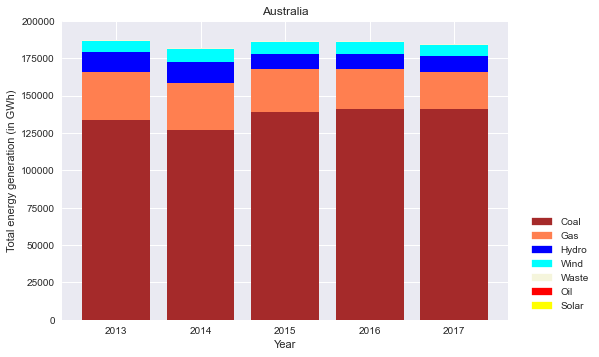

In [60]:
# https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib
p1 = plt.bar(ausfuel["index"], ausfuel["Coal"], color='brown')
p2 = plt.bar(ausfuel["index"], ausfuel["Gas"] ,bottom = ausfuel["Coal"], color='coral')
p3 = plt.bar(ausfuel["index"], ausfuel["Hydro"],
             bottom=[sum(x) for x in zip(ausfuel["Coal"],ausfuel["Gas"])], color='blue')
p4 = plt.bar(ausfuel["index"], ausfuel["Wind"],
             bottom=[sum(x) for x in zip(ausfuel["Coal"],ausfuel["Gas"],ausfuel["Hydro"])],
             color='cyan')
p5 = plt.bar(ausfuel["index"], ausfuel["Waste"],
             bottom=[sum(x) for x in zip(ausfuel["Coal"],ausfuel["Gas"],ausfuel["Hydro"], ausfuel["Wind"])],
             color='beige')
p6 = plt.bar(ausfuel["index"], ausfuel["Oil"],
             bottom=[sum(x) for x in zip(ausfuel["Coal"],ausfuel["Gas"],ausfuel["Hydro"], ausfuel["Wind"],ausfuel["Waste"])],
             color='red')
p7 = plt.bar(ausfuel["index"], ausfuel["Solar"],
             bottom=[sum(x) for x in zip(ausfuel["Coal"],ausfuel["Gas"],ausfuel["Hydro"], ausfuel["Wind"],ausfuel["Waste"],ausfuel["Oil"])],
             color='yellow')
plt.ylim(0,200000)
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])

# https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
colors = {'Coal':"brown", 'Gas':"coral", 'Hydro':"blue","Wind":"cyan", "Waste":"beige","Oil":"red","Solar":"yellow"}  
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(handles, labels, loc = 'lower right', bbox_to_anchor=(1.2, 0))
plt.xlabel("Year")
plt.ylabel("Total energy generation (in GWh)")
plt.title("Australia")

In [50]:
indfuel = ind.groupby("primary_fuel")
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
indfuel = indfuel.agg(**{'generation_2013_sum': pd.NamedAgg(column='generation_gwh_2013', aggfunc='sum'), 'generation_2014_sum': pd.NamedAgg(column='generation_gwh_2014', aggfunc='sum'),'generation_2015_sum': pd.NamedAgg(column='generation_gwh_2015', aggfunc='sum'),'generation_2016_sum': pd.NamedAgg(column='generation_gwh_2016', aggfunc='sum'),'generation_2017_sum': pd.NamedAgg(column='generation_gwh_2017', aggfunc='sum')})
indfuel = indfuel.sort_values(by='generation_2013_sum', ascending = False)
indfuel = indfuel.transpose() # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
indfuel = indfuel.reset_index()
indfuel

primary_fuel,index,Coal,Hydro,Gas,Nuclear,Oil
0,generation_2013_sum,673281.215887,134730.860500,43227.798060,30408.588,1472.718140
1,generation_2014_sum,757033.305820,129549.065670,40087.662382,30197.570,1545.684590
2,generation_2015_sum,776527.285698,118048.585625,44681.952652,31852.000,161.296300
3,generation_2016_sum,771422.520922,114584.490540,45975.321344,28456.850,41.457540
4,generation_2017_sum,788726.967779,113119.421695,46843.590481,26692.920,1.172299


Text(0.5, 1.0, 'India')

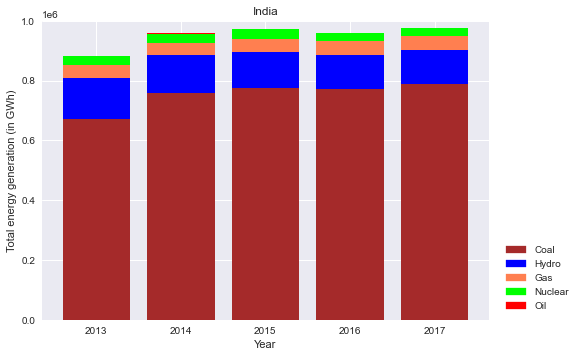

In [61]:
# https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib
p1 = plt.bar(indfuel["index"], indfuel["Coal"], color='brown')
p2 = plt.bar(indfuel["index"], indfuel["Hydro"] ,bottom = indfuel["Coal"], color='blue')
p3 = plt.bar(indfuel["index"], indfuel["Gas"],
             bottom=[sum(x) for x in zip(indfuel["Coal"],indfuel["Hydro"])], color='coral')
p4 = plt.bar(indfuel["index"], indfuel["Nuclear"],
             bottom=[sum(x) for x in zip(indfuel["Coal"],indfuel["Hydro"],indfuel["Gas"])],
             color='lime')
p5 = plt.bar(indfuel["index"], indfuel["Oil"],
             bottom=[sum(x) for x in zip(indfuel["Coal"],indfuel["Hydro"],indfuel["Gas"], indfuel["Nuclear"])],
             color='red')
plt.ylim(0,1000000)
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])

# https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
colors = {'Coal':"brown", 'Hydro':"blue", 'Gas':"coral", "Nuclear":"lime","Oil":"red"}  
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(handles, labels, loc = 'lower right', bbox_to_anchor=(1.2, 0))
plt.xlabel("Year")
plt.ylabel("Total energy generation (in GWh)")
plt.title("India")

In [52]:
usafuel = usa.groupby("primary_fuel")
# https://towardsdatascience.com/pandas-groupby-aggregate-transform-filter-c95ba3444bbb
usafuel = usafuel.agg(**{'generation_2013_sum': pd.NamedAgg(column='generation_gwh_2013', aggfunc='sum'), 'generation_2014_sum': pd.NamedAgg(column='generation_gwh_2014', aggfunc='sum'),'generation_2015_sum': pd.NamedAgg(column='generation_gwh_2015', aggfunc='sum'),'generation_2016_sum': pd.NamedAgg(column='generation_gwh_2016', aggfunc='sum'),'generation_2017_sum': pd.NamedAgg(column='generation_gwh_2017', aggfunc='sum')})
usafuel = usafuel.sort_values(by='generation_2013_sum', ascending = False)
usafuel = usafuel.transpose() # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html
usafuel = usafuel.reset_index()
usafuel

primary_fuel,index,Coal,Gas,Nuclear,Hydro,Wind,Waste,Biomass,Geothermal,Oil,Petcoke,Solar,Cogeneration,Storage,Other
0,generation_2013_sum,1.236409e+06,1.035080e+06,789441.28438,262547.91059,165929.52422,37537.028085,22524.019400,15190.41408,9748.595190,9440.433457,8703.71171,2913.223317,2555.109995,1641.563601
1,generation_2014_sum,1.226313e+06,9.888998e+05,794246.38498,252191.26390,175481.10923,39925.469958,22156.103066,15439.06400,10919.740883,8298.017789,14416.36562,2571.369460,1556.706961,1111.788140
2,generation_2015_sum,1.132222e+06,1.152978e+06,800949.65006,242657.66476,163105.44992,38496.968727,23207.512646,15542.93300,8027.793483,7614.145988,15788.77855,2536.329040,6.503000,1158.451570
3,generation_2016_sum,9.893195e+05,1.134830e+06,802618.33799,258460.17483,168966.39450,36514.908848,23486.398373,15485.47000,6459.947419,7927.401354,15762.61528,2525.474050,-52.441000,817.450131
4,generation_2017_sum,1.193689e+06,1.199717e+06,810261.21596,290871.46902,164833.16582,43545.825035,26111.411863,15512.24100,18955.820073,8328.008918,15536.16203,3745.671539,8.609000,1718.162676


Text(0.5, 1.0, 'USA')

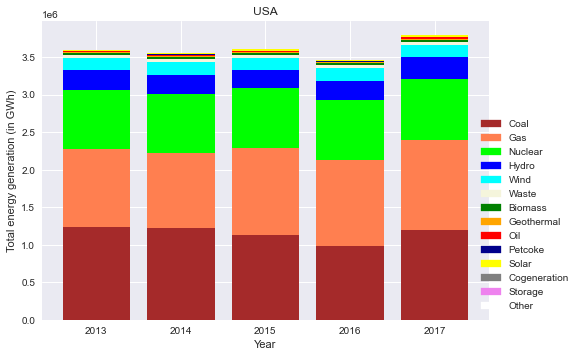

In [62]:
# https://stackoverflow.com/questions/44309507/stacked-bar-plot-using-matplotlib
p1 = plt.bar(usafuel["index"], usafuel["Coal"], color='brown')
p2 = plt.bar(usafuel["index"], usafuel["Gas"] ,bottom = usafuel["Coal"], color='coral')
p3 = plt.bar(usafuel["index"], usafuel["Nuclear"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"])], color='lime')
p4 = plt.bar(usafuel["index"], usafuel["Hydro"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"])],
             color='blue')
p5 = plt.bar(usafuel["index"], usafuel["Wind"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"])],
             color='cyan')
p6 = plt.bar(usafuel["index"], usafuel["Waste"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"])],
             color='beige')
p7 = plt.bar(usafuel["index"], usafuel["Biomass"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"])],
             color='green')
p8 = plt.bar(usafuel["index"], usafuel["Geothermal"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"])],
             color='orange')
p9 = plt.bar(usafuel["index"], usafuel["Oil"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"])],
             color='red')
p10 = plt.bar(usafuel["index"], usafuel["Petcoke"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"],usafuel["Oil"])],
             color='darkblue')
p11 = plt.bar(usafuel["index"], usafuel["Solar"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"],usafuel["Oil"],usafuel["Petcoke"])],
             color='yellow')
p12 = plt.bar(usafuel["index"], usafuel["Cogeneration"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"],usafuel["Oil"],usafuel["Petcoke"],usafuel["Solar"])],
             color='grey')
p13 = plt.bar(usafuel["index"], usafuel["Storage"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"],usafuel["Oil"],usafuel["Petcoke"],usafuel["Solar"],usafuel["Cogeneration"])],
             color='violet')
p14 = plt.bar(usafuel["index"], usafuel["Other"],
             bottom=[sum(x) for x in zip(usafuel["Coal"],usafuel["Gas"],usafuel["Nuclear"], usafuel["Hydro"],usafuel["Wind"],usafuel["Waste"],usafuel["Biomass"],usafuel["Geothermal"],usafuel["Oil"],usafuel["Petcoke"],usafuel["Solar"],usafuel["Cogeneration"],usafuel["Storage"])],
             color='white')
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])

# https://stackoverflow.com/questions/57340415/matplotlib-bar-plot-add-legend-from-categories-dataframe-column
colors = {'Coal':"brown", 'Gas':"coral", "Nuclear":"lime", "Hydro":"blue","Wind":"cyan","Waste":"beige","Biomass":"green","Geothermal":"orange","Oil":"red","Petcoke":"darkblue","Solar":"yellow","Cogeneration":"grey","Storage":"violet","Other":"white"}  
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
plt.legend(handles, labels, loc = 'lower right', bbox_to_anchor=(1.2, 0))
plt.xlabel("Year")
plt.ylabel("Total energy generation (in GWh)")
plt.title("USA")

## 5. Line plot: ratio of energy output sustainable fuel types over total energy output per year

In [54]:
ausfuel

primary_fuel,index,Coal,Gas,Hydro,Wind,Waste,Oil,Solar
0,generation_2013_sum,133964.440560,32008.918612,12961.368611,7263.585833,699.088056,106.010833,0.847778
1,generation_2014_sum,126699.720005,31765.243333,14298.104166,8428.466111,696.600833,47.653333,0.845278
2,generation_2015_sum,138685.592778,28785.228889,10563.897500,7756.222500,683.047222,61.086944,0.881111
3,generation_2016_sum,141270.820001,26505.675000,10301.105556,7805.489444,620.079167,87.641944,0.956389
4,generation_2017_sum,140683.171114,25301.246111,10570.422500,7276.498889,647.396667,100.602500,0.966944


In [55]:
# https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns
ausfuel['green'] = ausfuel["Hydro"]+ausfuel["Wind"]+ausfuel["Waste"]+ausfuel["Solar"]
ausfuel['all'] = ausfuel[list(ausfuel.columns)].sum(axis=1)
ausfuel['greenpercent'] = ausfuel['green']*100/ausfuel['all']
ausfuel

primary_fuel,index,Coal,Gas,Hydro,Wind,Waste,Oil,Solar,green,all,greenpercent
0,generation_2013_sum,133964.440560,32008.918612,12961.368611,7263.585833,699.088056,106.010833,0.847778,20924.890278,207929.150560,10.063471
1,generation_2014_sum,126699.720005,31765.243333,14298.104166,8428.466111,696.600833,47.653333,0.845278,23424.016388,205360.649448,11.406283
2,generation_2015_sum,138685.592778,28785.228889,10563.897500,7756.222500,683.047222,61.086944,0.881111,19004.048333,205540.005277,9.245912
3,generation_2016_sum,141270.820001,26505.675000,10301.105556,7805.489444,620.079167,87.641944,0.956389,18727.630556,205319.398057,9.121218
4,generation_2017_sum,140683.171114,25301.246111,10570.422500,7276.498889,647.396667,100.602500,0.966944,18495.285000,203075.589725,9.107587


Text(0.5, 1.0, 'Australia')

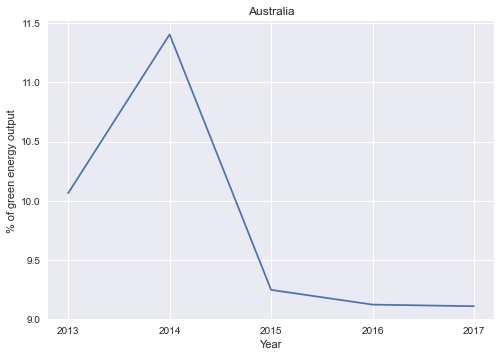

In [63]:
ausfuel["greenpercent"].plot()
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("% of green energy output")
plt.title("Australia")

In [64]:
indfuel

primary_fuel,index,Coal,Hydro,Gas,Nuclear,Oil
0,generation_2013_sum,673281.215887,134730.860500,43227.798060,30408.588,1472.718140
1,generation_2014_sum,757033.305820,129549.065670,40087.662382,30197.570,1545.684590
2,generation_2015_sum,776527.285698,118048.585625,44681.952652,31852.000,161.296300
3,generation_2016_sum,771422.520922,114584.490540,45975.321344,28456.850,41.457540
4,generation_2017_sum,788726.967779,113119.421695,46843.590481,26692.920,1.172299


In [65]:
# https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns
indfuel['green'] = indfuel["Hydro"]+indfuel["Nuclear"]
indfuel['all'] = indfuel[list(indfuel.columns)].sum(axis=1)
indfuel['greenpercent'] = indfuel['green']*100/indfuel['all']
indfuel

primary_fuel,index,Coal,Hydro,Gas,Nuclear,Oil,green,all,greenpercent
0,generation_2013_sum,673281.215887,134730.860500,43227.798060,30408.588,1472.718140,165139.448500,1.048261e+06,15.753663
1,generation_2014_sum,757033.305820,129549.065670,40087.662382,30197.570,1545.684590,159746.635670,1.118160e+06,14.286564
2,generation_2015_sum,776527.285698,118048.585625,44681.952652,31852.000,161.296300,149900.585625,1.121172e+06,13.369994
3,generation_2016_sum,771422.520922,114584.490540,45975.321344,28456.850,41.457540,143041.340540,1.103522e+06,12.962256
4,generation_2017_sum,788726.967779,113119.421695,46843.590481,26692.920,1.172299,139812.341695,1.115196e+06,12.537015


Text(0.5, 1.0, 'India')

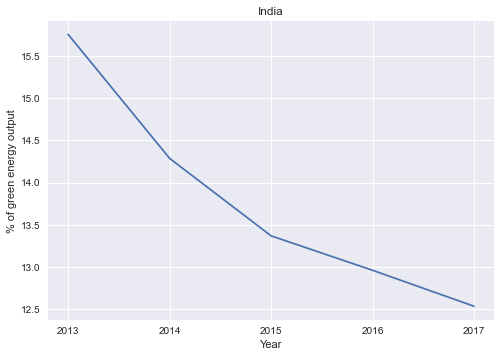

In [66]:
indfuel["greenpercent"].plot()
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("% of green energy output")
plt.title("India")

In [67]:
usafuel

primary_fuel,index,Coal,Gas,Nuclear,Hydro,Wind,Waste,Biomass,Geothermal,Oil,Petcoke,Solar,Cogeneration,Storage,Other
0,generation_2013_sum,1.236409e+06,1.035080e+06,789441.28438,262547.91059,165929.52422,37537.028085,22524.019400,15190.41408,9748.595190,9440.433457,8703.71171,2913.223317,2555.109995,1641.563601
1,generation_2014_sum,1.226313e+06,9.888998e+05,794246.38498,252191.26390,175481.10923,39925.469958,22156.103066,15439.06400,10919.740883,8298.017789,14416.36562,2571.369460,1556.706961,1111.788140
2,generation_2015_sum,1.132222e+06,1.152978e+06,800949.65006,242657.66476,163105.44992,38496.968727,23207.512646,15542.93300,8027.793483,7614.145988,15788.77855,2536.329040,6.503000,1158.451570
3,generation_2016_sum,9.893195e+05,1.134830e+06,802618.33799,258460.17483,168966.39450,36514.908848,23486.398373,15485.47000,6459.947419,7927.401354,15762.61528,2525.474050,-52.441000,817.450131
4,generation_2017_sum,1.193689e+06,1.199717e+06,810261.21596,290871.46902,164833.16582,43545.825035,26111.411863,15512.24100,18955.820073,8328.008918,15536.16203,3745.671539,8.609000,1718.162676


In [68]:
# https://stackoverflow.com/questions/34023918/make-new-column-in-panda-dataframe-by-adding-values-from-other-columns
usafuel['green'] = usafuel["Nuclear"]+usafuel["Hydro"]+usafuel["Wind"]+usafuel["Waste"]+usafuel["Biomass"]+usafuel["Geothermal"]+usafuel["Solar"]
usafuel['all'] = usafuel[list(usafuel.columns)].sum(axis=1)
usafuel['greenpercent'] = usafuel['green']*100/usafuel['all']
usafuel

primary_fuel,index,Coal,Gas,Nuclear,Hydro,Wind,Waste,Biomass,Geothermal,Oil,Petcoke,Solar,Cogeneration,Storage,Other,green,all,greenpercent
0,generation_2013_sum,1.236409e+06,1.035080e+06,789441.28438,262547.91059,165929.52422,37537.028085,22524.019400,15190.41408,9748.595190,9440.433457,8703.71171,2913.223317,2555.109995,1641.563601,1.301874e+06,4.901536e+06,26.560527
1,generation_2014_sum,1.226313e+06,9.888998e+05,794246.38498,252191.26390,175481.10923,39925.469958,22156.103066,15439.06400,10919.740883,8298.017789,14416.36562,2571.369460,1556.706961,1111.788140,1.313856e+06,4.867382e+06,26.993070
2,generation_2015_sum,1.132222e+06,1.152978e+06,800949.65006,242657.66476,163105.44992,38496.968727,23207.512646,15542.93300,8027.793483,7614.145988,15788.77855,2536.329040,6.503000,1158.451570,1.299749e+06,4.904041e+06,26.503631
3,generation_2016_sum,9.893195e+05,1.134830e+06,802618.33799,258460.17483,168966.39450,36514.908848,23486.398373,15485.47000,6459.947419,7927.401354,15762.61528,2525.474050,-52.441000,817.450131,1.321294e+06,4.784416e+06,27.616628
4,generation_2017_sum,1.193689e+06,1.199717e+06,810261.21596,290871.46902,164833.16582,43545.825035,26111.411863,15512.24100,18955.820073,8328.008918,15536.16203,3745.671539,8.609000,1718.162676,1.366671e+06,5.159505e+06,26.488421


Text(0.5, 1.0, 'USA')

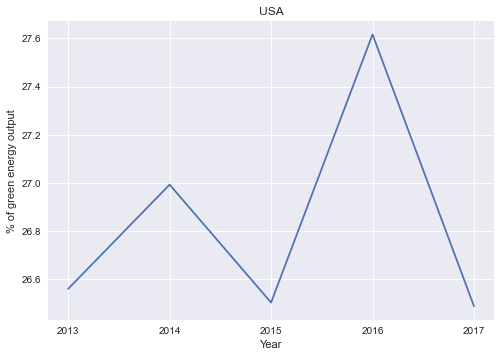

In [69]:
usafuel["greenpercent"].plot()
plt.xticks([0,1,2,3,4], [2013,2014,2015,2016,2017])
plt.xlabel("Year")
plt.ylabel("% of green energy output")
plt.title("USA")